# Nelinearne jednadžbe


__Problem:__ nađimo nul-točke funkcije $f(x)$ na zatvorenom intervalu $[a,b]$, odnosno, riješimo jednadžbu

$$
f(x)=0, \quad x\in[a,b]. \tag{1}
$$

Vrijedi sljedeće:

Ako je $f$ _neprekidna_ na $[a,b]$ i ako je $f(a)\cdot f(b)<0$, tada postoji barem jedna točka $\xi\in(a,b)$ takva da je 

$$
f(\xi)=0.
$$

Ako je još i $f'(x)\neq 0$ za $x\in(a,b)$, tada je $\xi$ _jedinstvena_.

Stoga jednadžbu (1) možemo riješiti u dva koraka:

1. Nađemo interval $[a,b]$ u kojem funkcija $f$ ima jedinstvenu nultočku $\xi$,
2. Aproksimiramo točku $\xi$ s unaprijed zadanom točnošću.

Opisat ćemo četiri metode:

1. metodu bisekcije,
2. metodu jednostavih iteracija,
3. Newtonovu metodu (metodu tangente) i 
4. metodu sekante.

Sve metode, uz zadanu početnu aproksimaciju $x_0$,  generiraju niz točaka $x_n$ koji, uz određene uvjete, konvergira
prema rješenju $\xi$. 

Metoda ima _red konvergencije_ jednak $r>0$ ako postoji $A>0$ takav da je

$$
|\xi-x_{n+1}|\leq A|\xi-x_n|^r.
$$

__Napomena:__ dokazi tvrdnji se nalaze u knjizi [Numerička matematika, poglavlje 4.1][RS04]. Brojevi primjera se odnose na isto poglavlje.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

## Bisekcija

Počevši od intervala $[a,b]\equiv [a_0,b_0]$, konstruiramo niz intervala 

$$
[a_0,b_0]\supset [a_1,b_1]\supset [a_2,b_2]\supset [a_3,b_3] \supset \cdots,
$$

gdje je $f(a_n)\cdot f(b_n)\leq 0$, i niz točaka

$$
x_{n+1}=\frac{a_n+b_n}{2}.
$$

_Brzina konvergencije_ je _linearna_ jer je 

$$
|\xi-x_{n+1}|\leq \frac{1}{2}|\xi-x_n|,
$$

a _pogreška aproksimacije_ je omeđena s

$$
|\xi-x_{n+1}|\leq \frac{1}{2}|a_n-b_n|.
$$

In [1]:
function mybisection(f::Function,a::T,b::T,ϵ::T) where T
    fa=f(a)
    fb=f(b)
    x=T
    fx=T
    if fa*fb>zero(T)
        return "Incorrect interval"
    end
    iter=0
    while b-a>ϵ && iter<1000
        x=(b+a)/2.0
        fx=f(x)
        if fa*fx<zero(T)
            b=x
            fb=fx
        else
            a=x
            fa=fx
        end
        iter+=1
        # @show x,fx
    end
    x,fx,iter
end

mybisection (generic function with 1 method)

In [2]:
# Za crtanje koristimo program Plots
using Plots

### Primjer 4.2

Zadana je funkcija 

$$
f(x)=e^x-x- \frac{5}{4}.
$$

Na slici vidimo da se jedna nul-točka nalazi u intervalu $[-1,0]$, a druga u intervalu $[0,1]$.

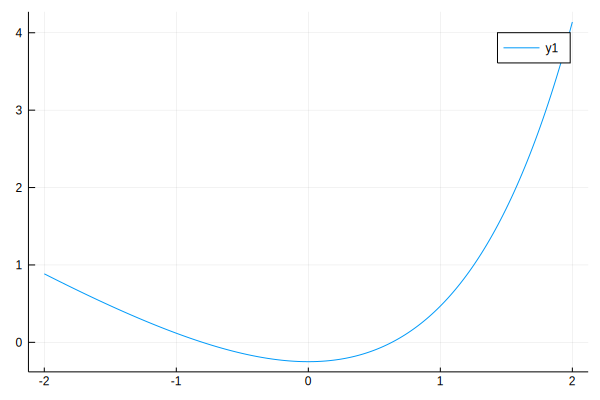

In [3]:
# Primjer 4.2
f(x)=exp(x)-x-5.0/4
plot(x->x,f,-2.0,2.0)

In [4]:
x₁,y₁,iter₁=mybisection(f,-1.0,0.0,1e-10)

(-0.8012179735233076, 4.3725023601837165e-12, 34)

In [5]:
x₂,y₂,iter₂=mybisection(f,0.0,1.0,1e-10)

(0.6327147526317276, 4.3370196323166965e-11, 34)

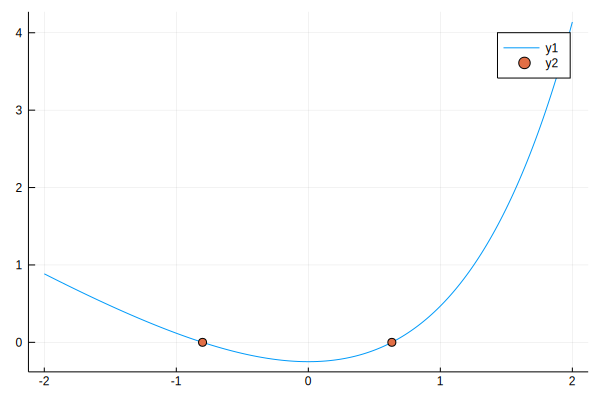

In [6]:
scatter!([x₁,x₂],[y₁,y₂])

### Primjer 4.3

Zadana je funkcija 

$$
f(x)=e^{-2x}\sin (6x)-\frac{2}{3}\,x-\frac{1}{2}.
$$

Na slici vidimo da se nul-točke nalaze u intervalima

$$
[-1,-0.4],\quad [-0.4,0.2],\quad [0.2,0.6],\quad [0.6,1].
$$

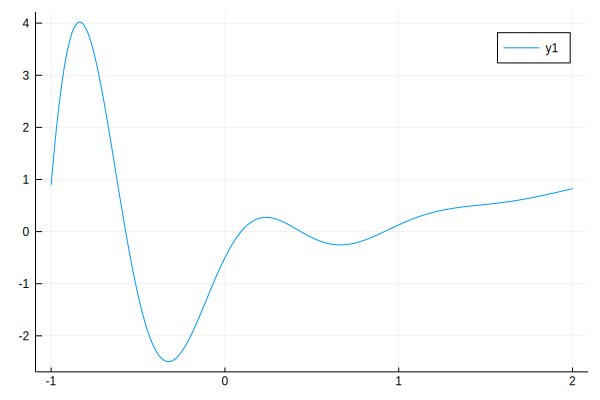

In [7]:
# Primjer 4.3
f(x)=exp(-2x)*sin(6x)+2x/3-1.0/2
plot(x->x,f,-1,2)

In [8]:
x₁,y₁,iter₁=mybisection(f,-1.0,-0.4,1e-5)

(-0.5710845947265626, 4.4328553922001745e-5, 16)

In [9]:
x₂,y₂,iter₂=mybisection(f,-0.4,0.2,1e-5)

(0.0925994873046875, 1.2173194170128632e-5, 16)

In [10]:
x₃,y₃,iter₃=mybisection(f,0.2,0.6,1e-5)

(0.43623657226562496, -9.395485695118388e-6, 16)

In [11]:
x₄,y₄,iter₄=mybisection(f,0.6,1.0,1e-5)

(0.917742919921875, 1.9683187612029585e-6, 16)

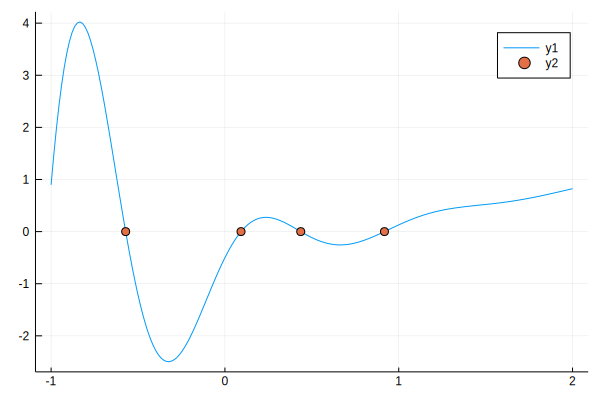

In [12]:
scatter!([x₁,x₂,x₃,x₄],[y₁,y₂,y₃,y₄])

### Primjer 4.4

Zadan je polinom

$$
f(x)=x^3-6x+2.
$$

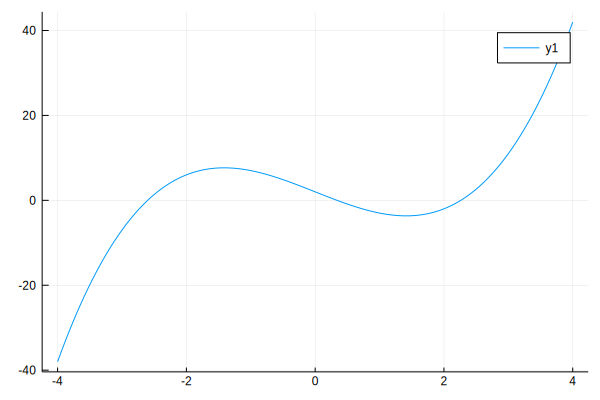

In [13]:
# Primjer 4.4 
f(x)=x^3-6*x+2
plot(x->x,f,-4,4)

In [14]:
x₁,y₁,iter₁=mybisection(f,-4.0,-2.0,1e-5)

(-2.6016769409179688, 3.134435505813826e-5, 18)

In [15]:
x₂,y₂,iter₂=mybisection(f,0.0,1.0,1e-5)

(0.33988189697265625, -2.8325740176082803e-5, 17)

In [16]:
x₃,y₃,iter₃=mybisection(f,1.0,3.0,1e-5)

(2.2618026733398438, 4.001370053074993e-6, 18)

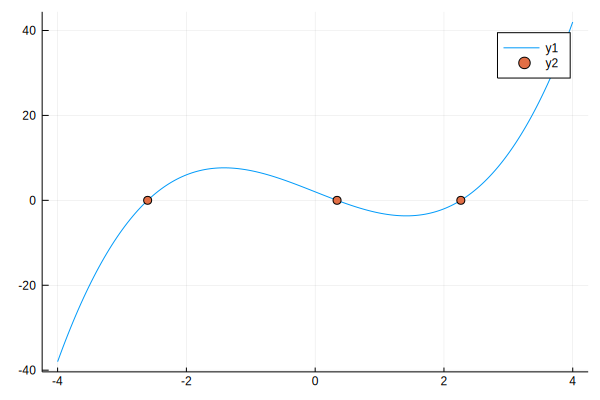

In [17]:
scatter!([x₁,x₂,x₃],[y₁,y₂,y₃])

### Primjer 4.5

Zadane su funkcije

\begin{align}
f(x)&=0.001\,x+0.5+\frac{\pi}{2}+\arctan(x), \tag{a}\\
f(x)&=1000\,(x-4)-e^x \tag{b}.
\end{align}

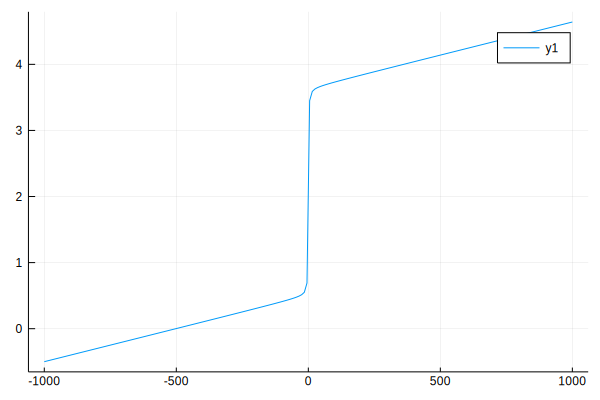

In [18]:
# Primjer 4.5 (a)
f(x)=0.001x+0.5+π/2+atan(x)
plot(x->x,f,-1000,1000)

In [19]:
x₁,y₁,iter₁=mybisection(f,-600.0,-400.0,1e-3)

(-501.9920349121094, 2.5932851865917428e-8, 18)

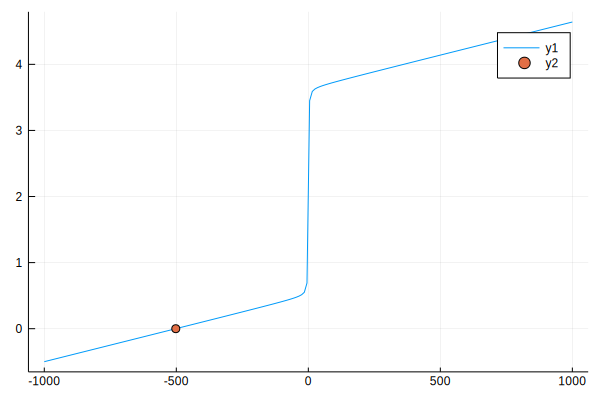

In [20]:
scatter!([x₁],[y₁])

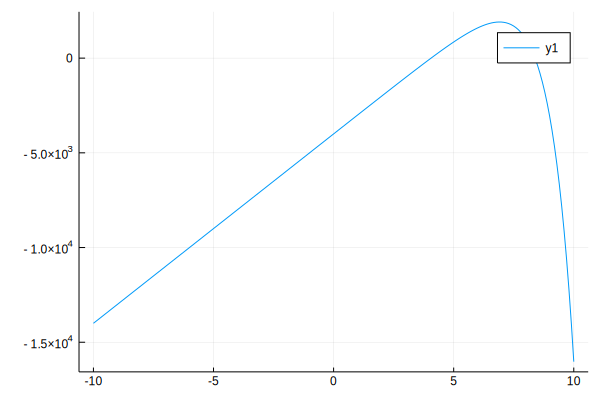

In [21]:
# Primjer 4.5 (b)
f(x)=1000(x-4)-exp(x)
plot(x->x,f,-10,10)

In [22]:
x₁,y₁,iter₁=mybisection(f,0.0,5.0,1e-8)

(4.05784978531301, -2.474680847797117e-6, 29)

In [23]:
x₂,y₂,iter₂=mybisection(f,5.0,10.0,1e-8)

(8.386223996058106, 1.0124924301635474e-5, 29)

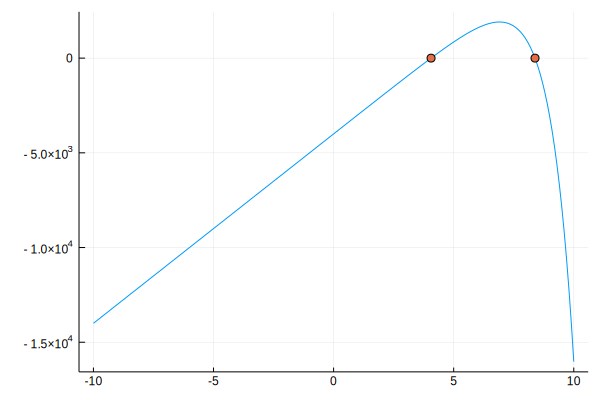

In [24]:
scatter!([x₁,x₂],[y₁,y₂],legend=false)

## Jednostavne iteracije

Rješavamo jednadžbu oblika 

$$
x=\varphi(x). \tag{2}
$$

__Teorem o fiksnoj točki.__ _(Banach)_
Neka je 

$$\varphi:[a,b]\to \mathbb{R}$$

_neprekidno derivabilna funkcija_ i neka vrijedi

\begin{align*}
\varphi(x) &\in [a,b] \quad  \forall x\in [a,b], \\
|\varphi'(x)|&\leq q<1 \quad \forall x\in(a,b) \tag{3}.
\end{align*}

Tada postoji jedinstvena _fiksna točka_ $\xi \in [a,b]$ za koju vrijedi
$\xi=\varphi(\xi)$. 

Nadalje, za proizvoljnu početnu točku  $x_0\in[a,b]$ niz 

$$
x_n=\varphi(x_{n-1}),\quad n=1,2,3,\ldots, 
$$

konvergira prema $\xi$ te vrijede _ocjene pogreške_:

\begin{align*}
|\xi-x_n|&\leq \displaystyle\frac{q^n}{1-q}|x_1-x_0|, \\
|\xi-x_n|&\leq \displaystyle\frac{q}{1-q}|x_n-x_{n-1}|, \\
|\xi-x_n|&\leq q|\xi-x_{n-1}|.
\end{align*}

Dakle, konvergencija je _linearna_.

Za dokaz teorema vidi [R. Scitovski, Numerička matematika, str. 73](https://www.mathos.unios.hr/nm/materijali/Num.PDF).

In [25]:
function myiteration(φ::Function,x::T,ϵ::T) where T
    ξ=φ(x)
    iter=0
    while abs(x-ξ)>ϵ && iter<1000
        x=ξ
        ξ=φ(x)
        iter+=1
    end
    ξ,iter
end

myiteration (generic function with 1 method)

Za korištenje metode iteracije potrebno je
transformirati oblik (1) u oblik (2) i to tako da je ispunjen uvjet (3).

Za procjenu derivacije možemo koristiti paket `Calculus.jl` koji aproksimira derivaciju konačnim razlikama ili paket
[`ForwardDiff.jl`](https://github.com/JuliaDiff/ForwardDiff.jl) koji koristi [automatsku diferencijaciju](https://en.wikipedia.org/wiki/Automatic_differentiation) i koji je točniji. Može se koristiti i simboličko računanje pomoću paketa `SymPy.jl`.

In [27]:
using ForwardDiff

In [28]:
varinfo(ForwardDiff.ForwardDiff)

| name        |        size | summary |
|:----------- | -----------:|:------- |
| DiffResults |  58.296 KiB | Module  |
| ForwardDiff | 268.418 KiB | Module  |


## Primjer 4.2 


Iz oblika 

$$
x=\exp(x)-\frac{5}{4}\equiv \Phi(x)
$$

možemo izračunati samo negativnu nul-točku, jer je u okolini pozitivne nul-točke $|\varphi'(x)|>1$.
Za $x_0=1.0$ niz divergira vrlo brzo, a za $x_0=0.6$, što je blizu pozitivne nul-točke, 
niz konvergira prema negativnoj nul-točki, i to bez teoretskog obrazloženja.

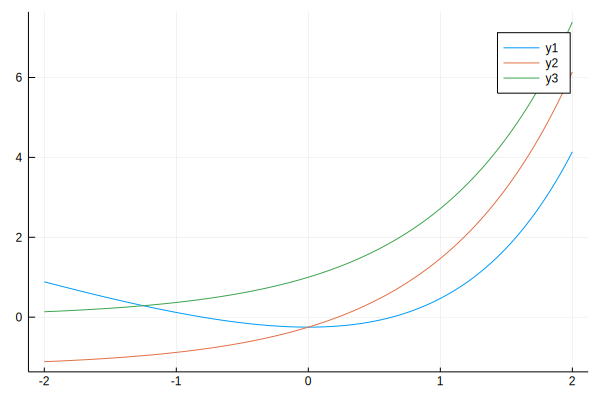

In [29]:
# Primjer 4.2
f(x)=exp(x)-x-5.0/4
φ(x)=exp(x)-5.0/4
plot(x->x,[f,φ,x->ForwardDiff.derivative(φ,x)],-2.0,2.0)

In [30]:
x₁,iter₁=myiteration(φ,0.5,1e-5)

(-0.8012112982162594, 18)

In [31]:
myiteration(φ,1.0,1e-5)

(Inf, 5)

In [32]:
myiteration(φ,0.6,1e-5)

(-0.8012141386307698, 21)

Pozitivnu nul-točku možemo izračunati iz prikaza

$$
x=\ln\big(x+\frac{5}{4}\big)\equiv \Psi(x).
$$

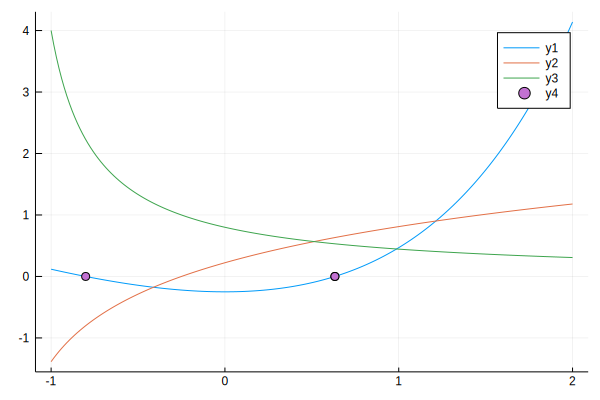

In [33]:
Ψ(x)=log(x+5.0/4)
x₂,iter₂=myiteration(Ψ,1.0,1e-5) 
x₃,iter₃=myiteration(Ψ,0.6,1e-5)
plot(x->x,[f,Ψ,x->ForwardDiff.derivative(Ψ,x)],-1.0,2.0)
scatter!([x₁,x₂,x₃],[0,0,0])

### Primjer 4.7

Izračunajmo približno $\sqrt(2)$, odnosno izračunajmo pozitivno rješenje jednadžbe 

$$
x^2-2=0.
$$

Jednadžbu je moguće pretvoriti u oblik (2) kao 

$$
x=\frac{2}{x},
$$

no tada je $\varphi'(x)=-\frac{2}{x^2}$ pa na intervalu $[1,2]$ ne vrijedi (3). Zato stavimo

$$
\frac{x}{2}=\frac{1}{x},
$$

odnosno

$$
x=\frac{x}{2}+\frac{1}{x}=\frac{1}{2}(x+\frac{2}{x})\equiv\varphi(x).
$$

Točna vrijednost se postiže nakon samo 4 iteracije!

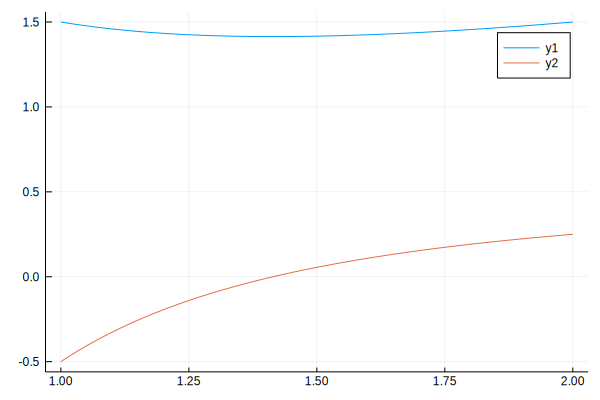

In [34]:
# Primjer 4.7
φ(x)=(x+2.0/x)/2.0
plot(x->x,[φ,x->ForwardDiff.derivative(φ,x)],1.0,2.0)

In [35]:
myiteration(φ,1.0,1e-15), sqrt(2)

((1.414213562373095, 5), 1.4142135623730951)

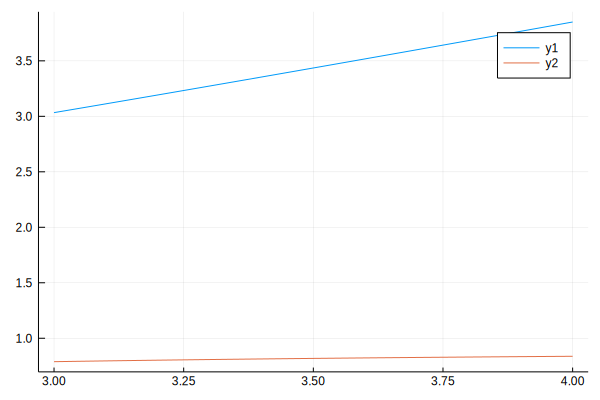

In [36]:
# Probajmo i sqrt(10)
φ(x)=(9x+10.0/x)/10.0
plot(x->x,[φ,x->ForwardDiff.derivative(φ,x)],3.0,4.0)

In [37]:
myiteration(φ,3.0,1e-10), sqrt(10)

((3.1622776597958935, 88), 3.1622776601683795)

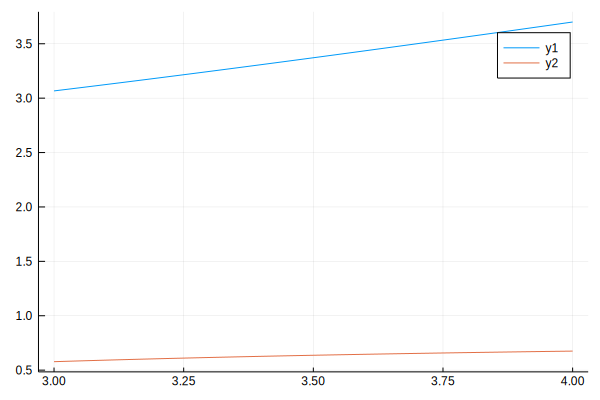

In [38]:
# Probajmo sqrt(10) na drugi način
φ(x)=(4x+10.0/x)/5.0
plot(x->x,[φ,x->ForwardDiff.derivative(φ,x)],3.0,4.0)

In [39]:
myiteration(φ,3.0,1e-10), sqrt(10)

((3.162277660043792, 40), 3.1622776601683795)

## Newtonova metoda

_Newtonova metoda_ ili _metoda tangente_ temelji se na sljedećoj ideji: zadanu funkciju $f(x)$ u okolini zadane početne aproksimacije $x_0$ aproksimiramo tangentom kroz točku $(x_0,f(x_0))$,

$$
f_1(x)=f(x_0)+f'(x_0)(x-x_0),
$$

te za sljedeću aproksimaciju uzmemo sjecište tangente s $x$-osi. Na taj dobijemo niz aproksimacija:

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)},\quad n=0,1,2,\ldots  \tag{4}
$$

Vrijedi sljedeći

__Teorem.__  Neka je zadana funkcija $f:[a,b]\to \mathbb{R}$ za koju vrijedi:

* $f''$ je neprekidna na $(a,b)$,
* $f(a)\cdot f(b)<0$,
* $f'$ i $f''$ imaju stalan predznak na $(a,b)$, i 
* $f(x_0)\cdot f''(x_0)>0$ za odabranu početnu aproksimaciju $x_0\in [a,b]$.

Tada niz (4) konvergira prema _jedinstvenom_ rješenju $\xi$ jednadžbe $f(x)=0$. 
Pri tome vrijede _ocjene pogreške_:

\begin{align*}
|\xi-x_n|&\leq \displaystyle\frac{M_2}{2m_1}(x_n-x_{n-1})^2, \\
|\xi-x_{n+1}|&\leq \displaystyle\frac{M_2}{2m_1}(\xi-x_{n})^2, \\
\end{align*}

gdje je 

$$
M_2=\max_{x\in(a,b)}|f''(x)|,\quad
m_1=\min_{x\in(a,b)}|f'(x)|.
$$

Dakle, konvergencija je _kvadratična_.

In [40]:
function myNewton(f::Function,x::T,ϵ::T) where T
    ξ=x-f(x)/(x->ForwardDiff.derivative(f,x))(x)
    iter=0
    while abs(x-ξ)>ϵ && iter<100
        x=ξ
        ξ=x-f(x)/(x->ForwardDiff.derivative(f,x))(x)
        iter+=1
    end
    ξ,iter
end

myNewton (generic function with 1 method)

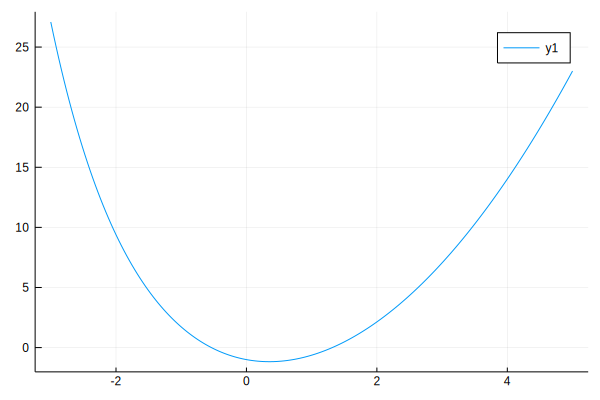

In [41]:
f(x)=exp(-x)+x^2-2
plot(x->x,f,-3,5)

Provjerimo uvjete teorema za pozitivnu nul-točku:

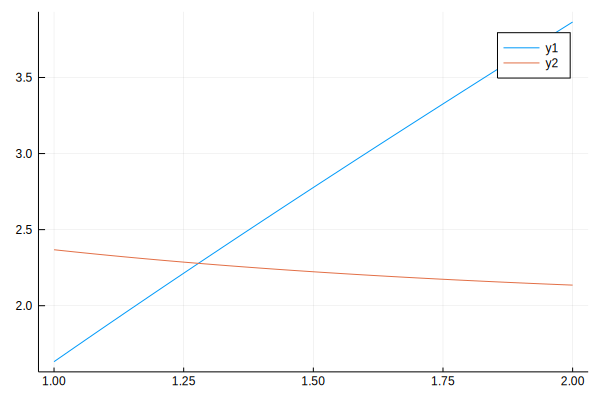

In [42]:
a=1
b=2
x0=1.5
plot(x->x,[x->ForwardDiff.derivative(f,x),
        x->ForwardDiff.derivative(x->ForwardDiff.derivative(f,x),x)],a,b)

In [43]:
f(a)*f(b)<0, 
f(x0)*(x->ForwardDiff.derivative(
        x->ForwardDiff.derivative(f,x),x))(x0)>0

(true, true)

In [44]:
x₁,iter₁=myNewton(f,x0,1e-10)

(1.3159737777962903, 4)

In [45]:
# Negativna nul-točka
a=-1
b=0
x0=-1.0
f(a)*f(b)<0, 
f(x0)*(x->ForwardDiff.derivative(
        x->ForwardDiff.derivative(f,x),x))(x0)>0

(true, true)

In [46]:
x₂,iter₂=myNewton(f,0.0,1e-10)

(-0.5372744491738566, 6)

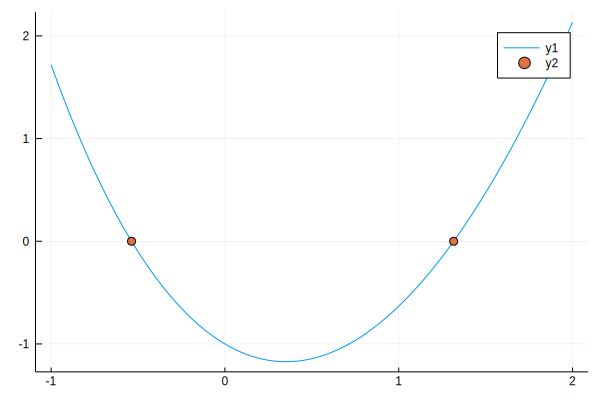

In [47]:
plot(x->x,f,-1.0,2)
scatter!([x₁,x₂],[0,0])

__Napomena.__ Ukoliko za početne aproksimacije odaberemo vrijednosti $x_0=1$, odnosno $x_0=0$, metoda će također konvergirati prema željenim nul-točkama, premda bez teoretskog obrazloženja: 

In [48]:
x0=1.0
f(x0)*(x->ForwardDiff.derivative(
        x->ForwardDiff.derivative(f,x),x))(x0)>0, 
myNewton(f,x0,1e-10)

(false, (1.31597377779629, 4))

In [49]:
x0=0.0
f(x0)*(x->ForwardDiff.derivative(
        x->ForwardDiff.derivative(f,x),x))(x0)>0, 
myNewton(f,x0,1e-10)

(false, (-0.5372744491738566, 6))

## Metoda sekante

Ukoliko u formuli (4) derivaciju $f'(x_n)$ aproksimiramo konačnom razlikom (sekantom) kroz _dvije_ prethodne točke,

$$
f'(x_n)\approx \frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}, 
$$

dobit ćemo niz

$$
x_{n+1}=\frac{x_{n-1}f(x_n)-x_nf(x_{n-1})}{f(x_n)-f(x_{n-1})},\qquad f(x_n)\neq f(x_{n-1}), \quad n=1,2,3,\ldots.
$$

Na početku trebamo odabrati _dvije_ početne aproksimacije, $x_0,x_1\in[a,b]$. Svojstva konvergencije su slična onima Newtonove metode.

In [50]:
function mysecant(f::Function,x::T,ζ::T,ϵ::T) where T
    ξ=(x*f(ζ)-ζ*f(x))/(f(ζ)-f(x))
    iter=0
    while abs(ζ-ξ)>ϵ && iter<100
        x=ζ
        ζ=ξ
        ξ=(x*f(ζ)-ζ*f(x))/(f(ζ)-f(x))
        iter+=1
    end
    ξ,iter
end

mysecant (generic function with 1 method)

In [51]:
mysecant(f,-1.0,0.0,1e-10), mysecant(f,1.0,2.0,1e-10)

((-0.5372744491738566, 7), (1.3159737777962903, 6))